# K-Means clustering analysis
### Unsupervised Learning
<img src = "images\machinelearning.gif">

<img src="https://nyghtowlblog.files.wordpress.com/2014/04/ml_algorithms.png?w=535&h=311">https://nyghtowlblog.files.wordpress.com/2014/04/ml_algorithms.png?w=535&h=311
<img src="http://cfile30.uf.tistory.com/image/156899344FEA735C2ADC9A">http://cfile30.uf.tistory.com/image/156899344FEA735C2ADC9A
<img src="http://scikit-learn.org/stable/_static/ml_map.png">
* http://scikit-learn.org/stable/
<img src="images\ppt\slide3.gif">
<img src="images\ppt\slide4.gif">
<img src="images\ppt\slide5.gif">
<img src="images\ppt\slide6.gif">
<img src="images\ppt\slide7.gif">
<img src="images\k-mean.gif">

<img src="images\ppt\slide8.gif">
<img src="images\ppt\slide9.gif">
<img src="images\ppt\slide10.gif">
<img src="images\ppt\slide12.gif">
<img src="images\ppt\slide13.gif">
<img src="images\ppt\slide14.gif">
<img src="images\ppt\slide15.gif">
<img src="images\ppt\slide12.gif">

<img src="https://datasciencelab.files.wordpress.com/2013/12/p_n2000_k15_.gif">

## Euclidean Distance

What is the distance between two data points (5, 5) and (2, 3)?

distance = $\sqrt{(5-2)^2}$+$\sqrt{(5-3)^2}$ = $\sqrt{13}$ = $3.6$

In [1]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
    
from sklearn.metrics.pairwise import euclidean_distances

point = [[5, 5], [2, 3]]
euclidean_distances(point, point)

array([[ 0.        ,  3.60555128],
       [ 3.60555128,  0.        ]])

In [2]:
euclidean_distances(point, [[0, 0]])

array([[ 7.07106781],
       [ 3.60555128]])

distance = $\sqrt{(5-0)^2}$+$\sqrt{(5-0)^2}$ = $\sqrt{50}$ = $7.07$

distance = $\sqrt{(2-0)^2}$+$\sqrt{(3-0)^2}$ = $\sqrt{13}$ = $3.60$

## The measure used in Euclidean distance is much influence by the scale of each variable

* Let's consider three individuals and find 2 clusters (two individuals in cluster 1 and the third person in cluster 2)

<img src="images\euclidean.gif">


In [3]:
p1 = [[200000, 90]]
p2 = [[250000, 90]]
p3 = [[180000, 10]]

In [4]:
euclidean_distances(p1, p2)

array([[ 50000.]])

In [5]:
euclidean_distances(p1, p3)

array([[ 20000.15999936]])

* This analysis indicates John and April are very close so they should be grouped into one cluster.
I would **disagree** with this result. Given that all three have high income, John and Matt should be grouped into one cluster since they are similar in terms of grade as well. But, the outcome is otherwise.
* This raises the need of **normalizing data before clustering analysis**
* Normalizing data means transforming data so the data samples can have unit norm
<br>
<br>
<img src="images\normalizing.gif">

### Euclidean Distance after scaling data samples to have unit norm

In [6]:
p1 = [[-0.27, 0.58]]
p2 = [[1.10, 0.58]]
p3 = [[-0.83, -1.15]]

In [7]:
euclidean_distances(p1, p2)

array([[ 1.37]])

In [8]:
euclidean_distances(p1, p3)

array([[ 1.8183784]])

This analysis indicates John and Matt should be in the same cluster. I would **agree** with this result.

# K-means clustering & Ch6dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('data/Chapter06Dataset.csv')
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
Weight         547 non-null int64
Cholesterol    547 non-null int64
Gender         547 non-null int64
dtypes: int64(3)
memory usage: 12.9 KB


there are 547 rows in the dataset, which has three columns; no missing values

In [12]:
df.describe()

,Weight,Cholesterol,Gender
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


# K-menas clustering

In [13]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#four clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [14]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [15]:
#clustering results
k_means.labels_

array([3, 3, 3, 2, 2, 1, 3, 0, 1, 1, 3, 1, 3, 0, 2, 1, 3, 1, 0, 2, 0, 3, 1,
       2, 3, 1, 3, 1, 1, 0, 1, 2, 0, 3, 1, 3, 1, 3, 2, 0, 1, 0, 2, 1, 1, 2,
       1, 2, 2, 3, 3, 0, 1, 0, 3, 0, 0, 1, 2, 0, 3, 0, 3, 1, 2, 0, 3, 0, 1,
       2, 2, 2, 2, 0, 1, 3, 2, 1, 3, 2, 2, 3, 1, 2, 3, 2, 0, 2, 2, 3, 0, 1,
       3, 3, 3, 2, 2, 0, 3, 3, 0, 1, 3, 2, 1, 1, 3, 0, 3, 1, 2, 1, 2, 3, 1,
       3, 2, 2, 0, 2, 1, 3, 0, 1, 1, 3, 1, 3, 0, 2, 1, 3, 1, 0, 2, 0, 3, 1,
       0, 3, 1, 3, 1, 1, 0, 1, 0, 0, 3, 1, 3, 1, 3, 2, 1, 1, 0, 2, 1, 1, 2,
       1, 2, 2, 3, 2, 0, 1, 0, 3, 1, 0, 1, 2, 0, 3, 0, 3, 1, 0, 0, 3, 0, 1,
       2, 2, 2, 2, 0, 1, 3, 2, 1, 3, 2, 2, 3, 1, 2, 3, 2, 0, 0, 2, 3, 0, 1,
       3, 3, 3, 2, 2, 0, 3, 3, 0, 1, 3, 2, 1, 1, 2, 0, 3, 1, 2, 1, 2, 3, 1,
       3, 2, 2, 0, 2, 1, 3, 0, 1, 1, 3, 1, 3, 0, 2, 1, 3, 1, 0, 2, 0, 3, 1,
       0, 3, 1, 3, 1, 1, 0, 1, 0, 0, 3, 1, 3, 1, 3, 2, 1, 1, 0, 2, 1, 1, 2,
       1, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 1, 2, 0, 3, 0, 3, 1, 0, 0, 3, 0, 1,
       2, 2,

All 547 people now belong to a cluster. for example, person #1 is assigned into cluster 1.
Remember we asked for 4 clusters. And they are labeled as cluster 0, cluster 1, cluster 2, and cluster 3. 

In [16]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 152.09322034,  185.90677966,    0.44067797],
       [ 184.31818182,  218.91558442,    0.59090909],
       [ 127.72592593,  154.38518519,    0.45925926],
       [ 106.85      ,  119.53571429,    0.54285714]])

In [17]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,3
1,3
2,3
3,2
4,2


In [18]:
df2 = df.join(df1)
df2.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,3
1,115,135,1,3
2,115,136,1,3
3,140,167,0,2
4,130,158,1,2


we can combine the cluster label into the original dataset. now the label is the 4th column in the new dataset

# Profiling each cluster: Profiling is the key purpose of clustering analysis

In [19]:
df2.groupby('cluster').mean()

,Weight,Cholesterol,Gender
cluster,,,
0,152.093220,185.906780,0.440678
1,184.318182,218.915584,0.590909
2,127.725926,154.385185,0.459259
3,106.850000,119.535714,0.542857


### This results shows "Gender" is NOT an important factor since about the equal number of male and female belong to clusters (as indicated by the fact that the mean of Gender in each cluster is almost same)

## profiling 
1. cluster 0: very high weight, high cholesterol
2. cluster 1: very low weight, low cholesterol
3. cluster 2: relatively low weight, medium cholesterol
4. cluster 3: relatively high weight, relatively high cholesterol

In [20]:
df2.groupby(['cluster']).count()
#which cluster is the largest

,Weight,Cholesterol,Gender
cluster,,,
0,118,118,118
1,154,154,154
2,135,135,135
3,140,140,140


Which is the largest?

# Data visualization

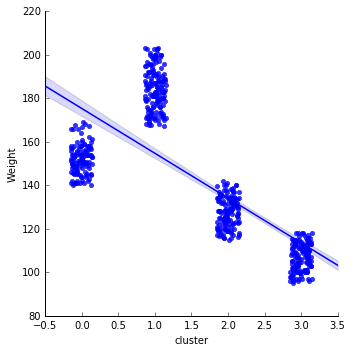

In [21]:
sns.lmplot("cluster", "Weight", df2, x_jitter=.15, y_jitter=.15)

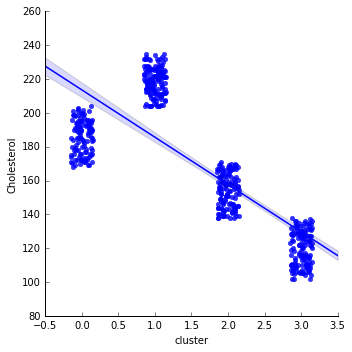

In [22]:
sns.lmplot("cluster", "Cholesterol", df2, x_jitter=.15, y_jitter=.15)

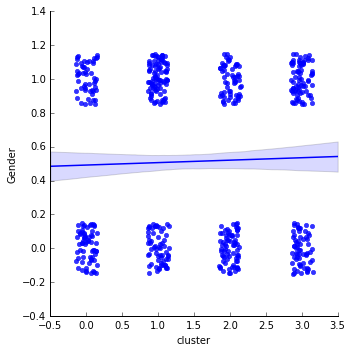

In [23]:
sns.lmplot("cluster", "Gender", df2, x_jitter=.15, y_jitter=.15)
# this graph shows Gender is not a factor

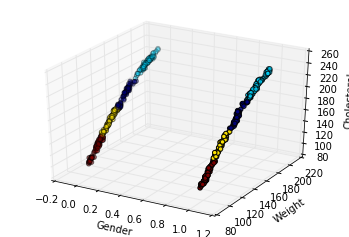

In [24]:
#http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

#3 dimension chart
#To explore 3d chart, disable %matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2['Gender']
y = df2['Weight']
z = df2['Cholesterol'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Gender')
ax.set_ylabel('Weight')
ax.set_zlabel('Cholesterol')

3 dimensional chart of the dataset with the cluster information. Gender is not a determining factor.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  from ipykernel import kernelapp as app


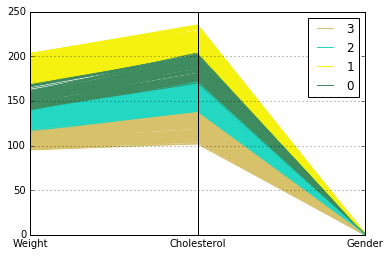

In [25]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df2, 'cluster')

# Normalizing the data

In [26]:
df = pd.read_csv('data/Chapter06Dataset.csv')
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [27]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,Weight,Cholesterol,Gender
0,-0.384928,-0.446867,0.486289
1,-0.264558,-0.266416,0.486289
2,-0.264558,-0.258897,0.486289
3,-0.033076,-0.025814,-0.513711
4,-0.125669,-0.093483,0.486289


In [28]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [29]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [30]:
k_means.labels_

array([1, 1, 1, 2, 1, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2, 0, 2, 3, 0, 2, 0, 2, 3,
       2, 1, 0, 2, 0, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 1, 3, 2, 0, 1, 3, 2, 3, 1, 3, 0,
       2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 3, 1, 1, 1, 3, 2, 2, 2, 0, 0,
       1, 1, 2, 1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 3, 2, 2, 1, 3, 1, 3, 1, 1, 0,
       1, 1, 1, 2, 1, 3, 1, 0, 0, 3, 2, 3, 2, 0, 2, 0, 2, 3, 0, 2, 0, 2, 3,
       2, 1, 0, 2, 0, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 1, 3, 2, 0, 1, 3, 2, 3, 1, 3, 0,
       2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 3, 1, 1, 1, 3, 2, 2, 2, 0, 0,
       1, 1, 2, 1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 3, 2, 2, 1, 3, 1, 3, 1, 1, 0,
       1, 1, 1, 2, 1, 3, 1, 0, 0, 3, 2, 3, 2, 0, 2, 0, 2, 3, 0, 2, 0, 2, 3,
       2, 1, 0, 2, 0, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 1, 3, 2, 0, 1, 3, 2, 3, 1, 3, 0,
       2, 1,

In [31]:
k_means.cluster_centers_

array([[ 0.27647204,  0.28818192, -0.51371115],
       [-0.26219345, -0.27676059,  0.48628885],
       [-0.19514256, -0.19467572, -0.51371115],
       [ 0.26765148,  0.27268216,  0.48628885]])

In [32]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,2
4,1


In [33]:
df2 = df_norm.join(df1)
df2.head()

,Weight,Cholesterol,Gender,cluster
0,-0.384928,-0.446867,0.486289,1
1,-0.264558,-0.266416,0.486289,1
2,-0.264558,-0.258897,0.486289,1
3,-0.033076,-0.025814,-0.513711,2
4,-0.125669,-0.093483,0.486289,1


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  from ipykernel import kernelapp as app


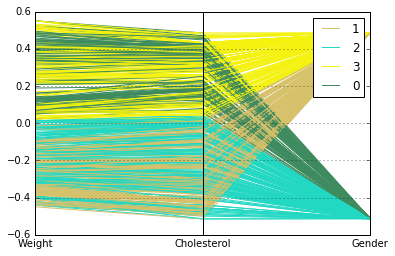

In [34]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df2, 'cluster')

In [35]:
df2.groupby(['cluster']).mean() 

,Weight,Cholesterol,Gender
cluster,,,
0,0.276472,0.288182,-0.513711
1,-0.262193,-0.276761,0.486289
2,-0.195143,-0.194676,-0.513711
3,0.267651,0.272682,0.486289


### Now, Gender appears to be an important factor in clustering analysis

## profiling 
1. cluster 0: High weight, high cholesterol, female
2. cluster 1: low weight, low cholesterol, male
3. cluster 2: low weight, low cholesterol, female
4. cluster 3: high weight, low cholesterol, male

In [36]:
df2.groupby(['cluster']).count()

,Weight,Cholesterol,Gender
cluster,,,
0,109,109,109
1,141,141,141
2,157,157,157
3,140,140,140


In [37]:
#visualization

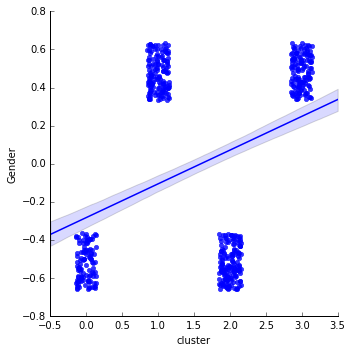

In [38]:
sns.lmplot("cluster", "Gender", df2, x_jitter=.15, y_jitter=.15)

# this graph shows Gender is a factor

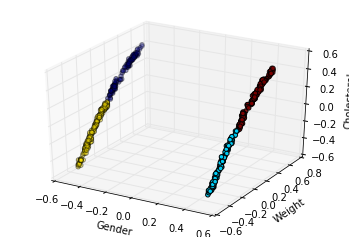

In [39]:
#3D chart

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2['Gender']
y = df2['Weight']
z = df2['Cholesterol'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Gender')
ax.set_ylabel('Weight')
ax.set_zlabel('Cholesterol')

plt.show()

# Let's build a decision tree model

In [40]:
y = df2['cluster'].values

In [41]:
X = df2.drop(['cluster'], axis=1)

In [42]:
X.head()

,Weight,Cholesterol,Gender
0,-0.384928,-0.446867,0.486289
1,-0.264558,-0.266416,0.486289
2,-0.264558,-0.258897,0.486289
3,-0.033076,-0.025814,-0.513711
4,-0.125669,-0.093483,0.486289


In [43]:
from sklearn import tree

In [44]:
# instantiate a decision tree model, and fit with X and y
model = tree.DecisionTreeClassifier()

model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

1.0

In [45]:
predicted_Y = model.predict(X)
print predicted_Y

[1 1 1 2 1 3 1 2 0 3 2 3 2 0 2 0 2 3 0 2 0 2 3 2 1 0 2 0 3 3 3 1 3 1 0 1 3
 1 2 3 3 3 1 0 3 2 3 2 2 2 2 3 3 3 2 0 0 0 1 3 2 0 1 3 2 3 1 3 0 2 1 2 1 0
 0 1 2 0 2 2 2 1 3 1 1 1 3 2 2 2 0 0 1 1 2 1 1 0 2 1 3 0 2 2 3 3 2 2 1 3 1
 3 1 1 0 1 1 1 2 1 3 1 0 0 3 2 3 2 0 2 0 2 3 0 2 0 2 3 2 1 0 2 0 3 3 3 1 3
 1 0 1 3 1 2 3 3 3 1 0 3 2 3 2 2 2 2 3 3 3 2 0 0 0 1 3 2 0 1 3 2 3 1 3 0 2
 1 2 1 0 0 1 2 0 2 2 2 1 3 1 1 1 3 2 2 2 0 0 1 1 2 1 1 0 2 1 3 0 2 2 3 3 2
 2 1 3 1 3 1 1 0 1 1 1 2 1 3 1 0 0 3 2 3 2 0 2 0 2 3 0 2 0 2 3 2 1 0 2 0 3
 3 3 1 3 1 0 1 3 1 2 3 3 3 1 0 3 2 3 2 2 2 2 3 3 3 2 0 0 0 1 3 2 0 1 3 2 3
 1 3 0 2 1 2 1 0 0 1 2 0 2 2 2 1 3 1 1 1 3 2 2 2 0 0 1 1 2 1 1 0 2 1 3 0 2
 2 3 3 2 2 1 3 1 3 1 1 0 1 1 1 2 1 3 1 0 0 3 2 3 2 0 2 0 2 3 0 2 0 2 3 2 1
 0 2 0 3 3 3 1 3 1 0 1 3 1 2 3 3 3 1 0 3 2 3 2 2 2 2 3 3 3 2 0 0 0 1 3 2 0
 1 3 2 3 1 3 0 2 1 2 1 0 0 1 2 0 2 2 2 1 3 1 1 1 3 2 2 2 0 0 1 1 2 1 1 0 2
 1 3 0 2 2 3 3 2 2 1 3 1 3 1 1 0 1 1 1 2 1 3 1 0 0 3 2 3 2 0 2 0 2 3 0 2 0
 2 3 2 1 0 2 0 3 3 3 1 3 

In [46]:
tree.export_graphviz(model, out_file='data/tree.dot', feature_names=X.columns)

#tree.export_graphviz(model, out_file='data/tree.dot', feature_names=['Weight','Cholesterol','Gender'])

#the decision tree shows "Gender" is the key factor since this is the first factor divising clusters 

<img src="images\tree.gif">

<img scr="images\tree.gif">

# How to determine an optimal value of k

## The "Elbow" Method
"... looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), **but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"**."

http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method

<img src="http://images.clipartpanda.com/elbow-clipart-elbow.jpg">
<img src="images\elbow.gif">
- The graph suggest that 3 or 4 is a good value for K
- The average distortion improves rapidly as we increase  from 1 to 2 and 2 to 3. 
- There is little improvement for values of greater than 4. 

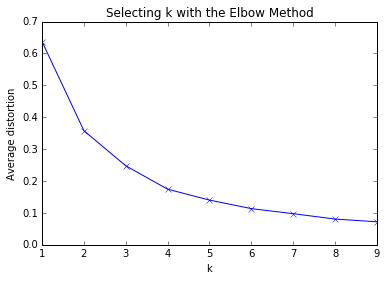

In [47]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

## The Sihouette Method

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is calculated using the **mean intra-cluster distance (a)** and the **mean nearest-cluster distance (b)** for each sample. 

- a: The mean distance between a sample and all other points in the same class.
- b: The mean distance between a sample and all other points in the next nearest cluster.

    * The **lower a** is, the better clustering is 
    * The **higher b** is, the better clustering is 

                        s = (b - a)/(max(a, b))

                        For example,
                            (1 - 0)/(max(0, 1)) = 1 (excellent clusters)
                            (0 - 1)/(max(0, 1)) = 0 (overlapping clusters) 
                        
http://scikit-learn.org/stable/modules/clustering.html
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

**The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.** Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [48]:
#read this page ... https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_kmeans_silhouette_analysis.py

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.64329448359130881

- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [49]:
#adapted from http://scikit-learn.org/stable/modules/clustering.html

tests = [2, 3, 4, 5, 8]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(X, labels, metric='euclidean')

0.58894411629
0.618407608304
0.643294483591
0.638205160563
0.615227973705
